In [1]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
%matplotlib inline

In [2]:
# print(tf.version.VERSION)
# tf.config.list_physical_devices('GPU')

In [3]:
model_type = 'vgg16'

In [4]:
#Defining Variables

#Data set information
DATASET = 'fashion_mnist'
num_classes = 2
input_shape=(28,28,1)
epochs = 200
lrate = 0.01
decay = lrate/epochs
batch_size = 32
seed = 7
np.random.seed(seed)

validate_dir = os.path.join("data","test")
train_dir = os.path.join("data","train")

# Prepare model model saving directory.
model_home_dir = os.path.join(os.getcwd(), 'CNN_TASK_ODED',"model_type")
save_dir = os.path.join(model_home_dir, 'saved_models')

model_name = DATASET+'_'+'%s_model.{epoch:03d}.h5' % model_type

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print("Model Type: ",model_type)
print("Model File: ",filepath)

Model Type:  vgg16
Model File:  /home/ec2-user/SageMaker/Research/AWS/CNN_TASK_ODED/model_type/saved_models/fashion_mnist_vgg16_model.{epoch:03d}.h5


In [5]:
import numpy

(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape, X_train.shape[1:],X_train.dtype

class_7_index = np.where(y_train.reshape(-1) == 7)
X_train_class_7 = X_train[class_7_index]
y_train_class_7 = y_train[class_7_index]


class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']

# print("------------------y_train_class_7-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train_class_0[i])
#     plt.xlabel(class_names[y_train_class_0[i][0]])
# plt.show()

class_9_index = np.where(y_train.reshape(-1) == 9)
X_train_class_9 = X_train[class_9_index]
y_train_class_9 = y_train[class_9_index]

# print("------------------y_train_class_9-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train_class_9[i])
#     plt.xlabel(class_names[y_train_class_9[i][0]])
# plt.show()


X_train = np.concatenate((X_train_class_7, X_train_class_9))
y_train = np.concatenate((y_train_class_7, y_train_class_9)).reshape(-1,1)

# print("------------------concatenate train-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,10000)
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[j])
#     plt.xlabel(class_names[y_train[j][0]])
# plt.show()

# ---------------------------------------------------------------------------

class_7_index = np.where(y_test.reshape(-1) == 7)
X_test_class_7 = X_test[class_7_index]
y_test_class_7 = y_test[class_7_index]

# print("------------------y_test_class_7-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test_class_7[i])
#     plt.xlabel(class_names[y_test_class_7[i][0]])
# plt.show()

class_9_index = np.where(y_test.reshape(-1) == 9)
X_test_class_9 = X_test[class_9_index]
y_test_class_9 = y_test[class_9_index]


# print("------------------y_test_class_9-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test_class_9[i])
#     plt.xlabel(class_names[y_test_class_9[i][0]])
# plt.show()


X_test = np.concatenate((X_test_class_7, X_test_class_9))
y_test = np.concatenate((y_test_class_7, y_test_class_9)).reshape(-1,1)

# print("------------------concatenate test-------------------")
# plt.figure(figsize=(10,10))
# for i in range(25):
#     j = random.randint(0,2000) 
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_test[j])
#     plt.xlabel(class_names[y_test[j][0]])
# plt.show()

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)


(12000, 1) (2000, 1)
(12000, 28, 28) (2000, 28, 28)


In [6]:
y_train_class_9.shape

(6000,)

In [7]:
y_train = np.where(y_train > 7, 9, 7)
y_test = np.where(y_test > 7, 9, 7)

print(y_train.shape, y_test.shape)

(12000, 1) (2000, 1)


(11900, 1) (2100, 1)
(11900, 28, 28) (2100, 28, 28)
------------------concatenate train-------------------


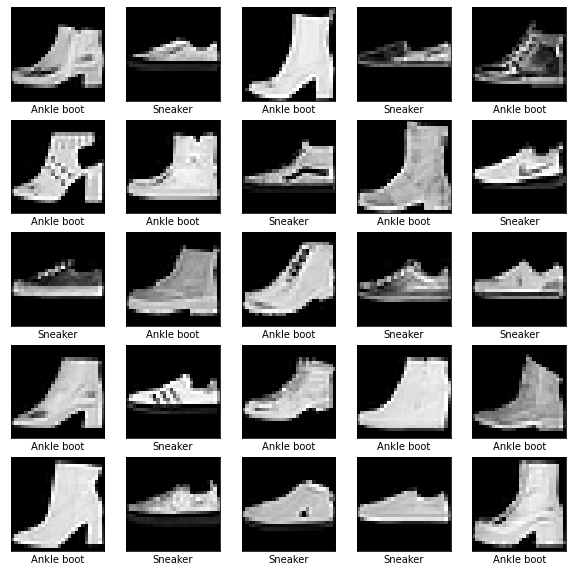

------------------concatenate test-------------------


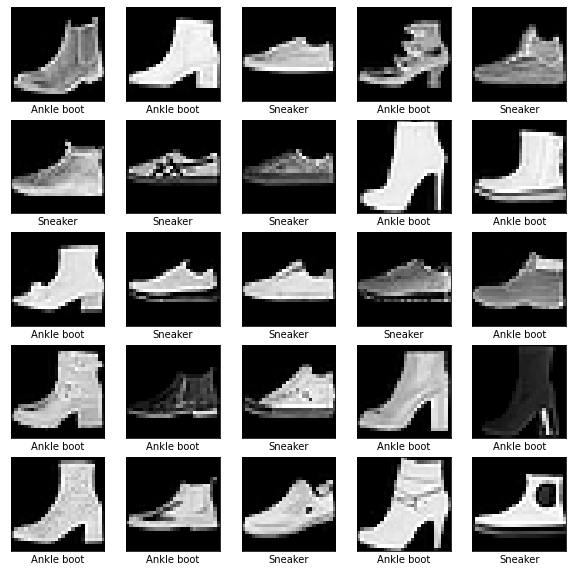

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = np.concatenate((X_test, X_train))
Y = np.concatenate((y_test, y_train)).reshape(-1,1)

# X, y = shuffle(X, Y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

print("------------------concatenate train-------------------")
plt.figure(figsize=(10,10))
for i in range(25):
    j = random.randint(0,1000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j], cmap=plt.get_cmap('gray'))
    plt.xlabel(class_names[y_train[j][0].astype('int')])
plt.show()

print("------------------concatenate test-------------------")
plt.figure(figsize=(10,10))
for i in range(25):
    j = random.randint(0,500) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[j], cmap=plt.get_cmap('gray'))
    plt.xlabel(class_names[y_test[j][0].astype('int')])
plt.show()



In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

X_train_mean = np.mean(X_train)
X_train -= X_train_mean
X_test_mean = np.mean(X_test)
X_test -= X_test_mean

y_train = np_utils.to_categorical(y_train,)
y_test = np_utils.to_categorical(y_test,)
y_train = np.delete(y_train,[0,1,2,3,4,5,6,7,8],1)
y_test = np.delete(y_test,[0,1,2,3,4,5,6,7,8],1)
print(y_train.shape, y_test.shape)



(11900, 1) (2100, 1)


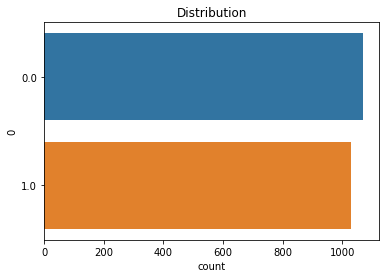

 Sneaker :1070
 Ankle boot :1030


In [10]:
import seaborn as sns
import pandas as pd


plt.title('Distribution')
sns.countplot(y = 0, data=pd.DataFrame(y_test))
plt.show()

print(f' Sneaker :{np.count_nonzero(y_test == 0)}')
print(f' Ankle boot :{np.count_nonzero(y_test == 1)}')

In [11]:
from tensorflow.keras.layers import Dropout
def vgg16(input_shape=(32,32,3), num_classes=2):
  model = Sequential()
  model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Dropout(0.8))

  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  return model

In [12]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


In [13]:
# Prepare callbacks for model saving and for learning rate adjustment.

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler,early_stopping]


In [14]:
import keras
model = vgg16(input_shape,num_classes)

# Compile model

# optimizer = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer,
              loss=keras.losses.BinaryCrossentropy(label_smoothing = 0.65),
              metrics=[keras.metrics.BinaryAccuracy()])
print("Model Summary of ",model_type)
print(model.summary())



Model Summary of  vgg16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                

/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
# Score trained model.
history = model.fit(X_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_test, y_test),
      shuffle=True,
      callbacks=callbacks)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Learning rate:  0.001
Epoch 1/200
372/372 [==============================] - 6s 9ms/step - loss: 0.6579 - binary_accuracy: 0.8266 - val_loss: 0.6419 - val_binary_accuracy: 0.9410 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
372/372 [==============================] - 2s 6ms/step - loss: 0.6423 - binary_accuracy: 0.9417 - val_loss: 0.6391 - val_binary_accuracy: 0.9581 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
372/372 [==============================] - 2s 6ms/step - loss: 0.6394 - binary_accuracy: 0.9571 - val_loss: 0.6363 - val_binary_accuracy: 0.9719 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
372/372 [==============================] - 2s 6ms/step - loss: 0.6387 - binary_accuracy: 0.9595 - val_loss: 0.6357 - val_binary_accuracy: 0.9733 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
372/372 [==============================] - 2s 6ms/step - loss: 0.6378 - binary_accuracy: 0.9639 - val_loss: 0.6357 - val_binary_accuracy: 0.9757 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
372/37

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])


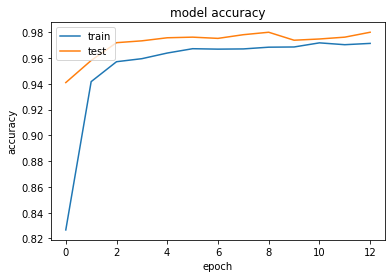

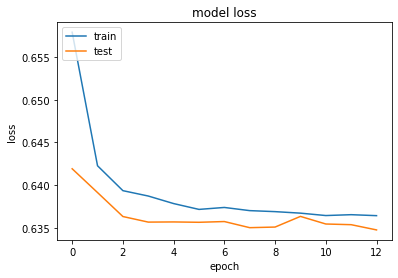

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

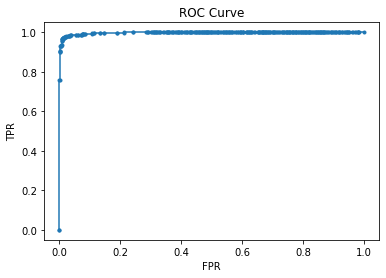

0.9974131204064967


In [17]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.title('ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

print(auc_keras)


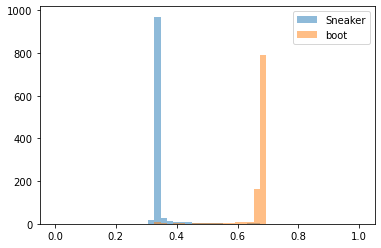

In [18]:
from matplotlib import pyplot
predict_x=model.predict(X_test) 

Sneaker_index = np.where(y_test.reshape(-1) == 0.)
Sneaker = predict_x[Sneaker_index]

boot_index = np.where(y_test.reshape(-1) == 1.)
boot = predict_x[boot_index]



bins = np.linspace(0, 1, 50)

pyplot.hist(Sneaker, bins, alpha=0.5, label='Sneaker')
pyplot.hist(boot, bins, alpha=0.5, label='boot')
pyplot.legend(loc='upper right')
pyplot.show()

In [19]:
len(Sneaker)

1070

In [20]:
len(boot)

1030